### Dimensionality Reduction
 - <b>PCA</b> (Pricipal Component Analysis): for unsupervised data compression
 - <b>LDA</b> (Linear Discriminant Analysis): supervised dimensionality reduction technique for maximizing class seperability
 - <b>Kernel Pricipal Component Analysis</b>: nonlinear dimentionality reduction

#### Unsupervised dimensionality reduction via principal component analysis

PCA
1. Standardize the d-dimensionality reduction via principal component analysis-dimensional dataset.
2. Construct the covariance matrix.
3. Decompose the covariance matrix into its eigenvectors and eigenvalues.
4. Select k-dimensionality eigenvectors that correspond to the k largest eigenvalues, where k is the dimensionality of the new feature subspace (k<=d).
5. Construct a projection matrix W from the "top" k eigenvectors.
6. Transform the d-dimensional input dataset X using the projection matrix W to obtain the new k-dimensional feature subspace.

###### Total and explained variance (first 4 steps of PCA)

In [0]:
## Wine dataset
import pandas as pd
df_wine = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', 
                      header=None)

In [0]:
## Split into train/test sets, 70/30 split respectively
### and standardize it to unit variance
#Step 1
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X, y = df_wine.iloc[:,1:].values, df_wine.iloc[:,0].values
X_train, X_test, y_train, y_test = \
             train_test_split(X, y,
             test_size=0.3, random_state=0)
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)


In [3]:
## Constructing the covariance matrix
# step 2
import numpy as np
cov_mat = np.cov(X_test_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print ('\nEigenvalues \n%s' % eigen_vals)


Eigenvalues 
[4.56925538 2.77783959 1.5624868  1.28185891 0.90546391 0.60179815
 0.44416355 0.11558188 0.12690572 0.16476973 0.20106681 0.25505244
 0.23904014]


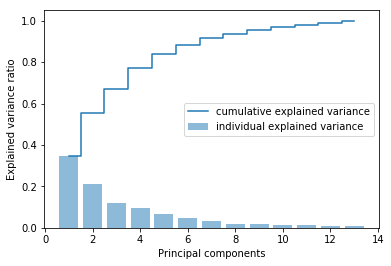

In [4]:
## sum of explained variance
## using cumsum (cumulative sum)
### then plot
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
import matplotlib.pyplot as plt
%matplotlib inline
plt.bar(range(1,14), var_exp, alpha=0.5, align='center',
       label='individual explained variance')
plt.step(range(1,14), cum_var_exp, where='mid',
        label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()


### Feature transformation
(last 4 steps for PCA)

In [0]:
## sort eigenpairs by decreasing order of the eigenvalues
eigen_pairs = [(np.abs(eigen_vals[i], eigen_vecs[:,i])
               for i in range(len(eigen_vals)))]
eigen_pairs.sort(reverse=True)

In [6]:
## here we will choose top two eigenvectors(for illustration),
## that correspond to the larges values to capture, ~60% of 
## the variance in this dataset
####
# IN PRACTICE: the number of Pricipal Components has to be 
# determined from a trade-off between computational efficiency 
# and the performance of the classifier

# eigen_pairs = list(eigen_pairs)
# w= np.hstack((eigen_pairs[0][1][:, np.newaxis],
#               eigen_pairs[1][1][:, np.newaxis]))
# print('Matrix W:\n',w)
# Matrix W:
# [[ 0.14669811  0.50417079]
# [-0.24224554  0.24216889]
# [-0.02993442  0.28698484]
# [-0.25519002 -0.06468718]
# [ 0.12079772  0.22995385]
# [ 0.38934455  0.09363991]
# [ 0.42326486  0.01088622]
# [-0.30634956  0.01870216]
# [ 0.30572219  0.03040352]
# [-0.09869191  0.54527081]
# [ 0.30032535 -0.27924322]
# [ 0.36821154 -0.174365  ]
# [ 0.29259713  0.36315461]]
w =np.array([
    [ 0.14669811,  0.50417079],
    [-0.24224554,  0.24216889],
    [-0.02993442,  0.28698484],
    [-0.25519002, -0.06468718],
    [ 0.12079772,  0.22995385],
    [ 0.38934455,  0.09363991],
    [ 0.42326486,  0.01088622],
    [-0.30634956,  0.01870216],
    [ 0.30572219,  0.03040352],
    [-0.09869191,  0.54527081],
    [ 0.30032535, -0.27924322],
    [ 0.36821154, -0.174365  ],
    [ 0.29259713,  0.36315461]])
w.shape

(13, 2)

In [7]:
## transform sample x(1x13 row vector) onto PCA subspace
## obtaining x', a now two-dimentional sample vector
## consisting of the new features: x' = xW
X_train_std[0].dot(w)

array([2.59891629, 0.00484089])

In [8]:
## can similarly transform entire training set onto
## 2 principal components by cal matrix dot prod: X' = XW
X_train_pca = X_train_std.dot(w)
# a = []
# for i in range(X_train_pca.shape[0]):
#     a.append(list([X_train_pca[i][0,0], X_train_pca[i][0,1]]))

# # X_train_pca[0][1,0]
# a = np.array(a)
# a = np.asmatrix(a)
# X_train_pca = a
X_train_pca.shape

(124, 2)

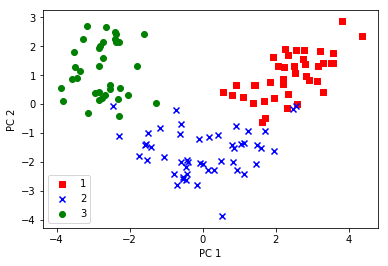

In [9]:
# visualizing the transformed set
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train==l, 0], 
                X_train_pca[y_train==l, 1], 
                c=c, label=l, marker=m) 
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.show()

## PCA in sklearn

In [0]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all poi

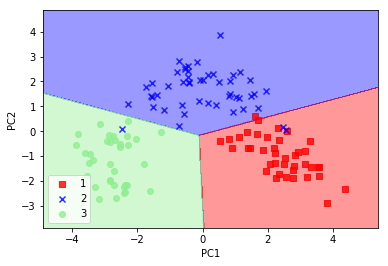

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
lr = LogisticRegression()
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
lr.fit(X_train_pca, y_train)
plot_decision_regions(X_train_pca, y_train,
                     classifier=lr)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc='lower left')
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


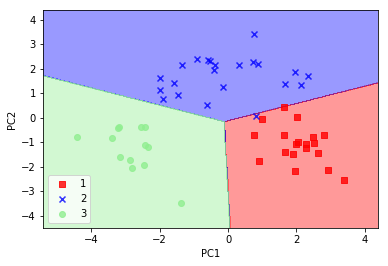

In [12]:
## plot decision regions of log-reg on transformed test data
## to see if can seperate classes well
plot_decision_regions(X_test_pca, y_test, classifier=lr)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc='lower left')
plt.show()

In [13]:
## If we are just interested in the variance ratios of the
## different principal components, can initialize the 
## PCA class with n_components to None
pca = PCA(n_components=None)
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([0.37329648, 0.18818926, 0.10896791, 0.07724389, 0.06478595,
       0.04592014, 0.03986936, 0.02521914, 0.02258181, 0.01830924,
       0.01635336, 0.01284271, 0.00642076])

## Supervised Data compression via Linear Discriminant Analysis (LDA)

### LDA Steps
1. Standardize the d-dimensional dataset (d is the number of features).
2. For each class, compute the d-dimensional mean vector.
3. Construct the between-class scatter matrix S_b and the within-class scatter matrix S_w.
4. Compute the eigenvectors and corresponding eigenvalues of the matrix inv(S_w)*S_b.
5. Choose the k eigenvectors that correspond to the k largest eigenvalues to construct a dxk-dimensional transformation matrix W; the eigenvectors are the columns of this matrix.
6. Project the samples onto the new feature subspace using the transformation matrix W.

#### NOTE
 assumptions that we make when we are using LDA are that the features are normally distributed and independent of each other. Also, the LDA algorithm assumes that the covariance matrices for the individual classes are identical. However, even if we violate those assumptions to a certain extent, LDA may still work reasonably well in dimensionality reduction and classification tasks

In [14]:
# 1.calculate mean vectors
np.set_printoptions(precision=4)
mean_vecs = []
labels = np.unique(y_train)
for label in labels:
    mean_vecs.append(np.mean(X_train_std[y_train==label], axis=0))

# print mean vector
for i in range(len(mean_vecs)):
    print ("MeanVector[%d] ---> \n" %(i), mean_vecs[i])

MeanVector[0] ---> 
 [ 0.9259 -0.3091  0.2592 -0.7989  0.3039  0.9608  1.0515 -0.6306  0.5354
  0.2209  0.4855  0.798   1.2017]
MeanVector[1] ---> 
 [-0.8727 -0.3854 -0.4437  0.2481 -0.2409 -0.1059  0.0187 -0.0164  0.1095
 -0.8796  0.4392  0.2776 -0.7016]
MeanVector[2] ---> 
 [ 0.1637  0.8929  0.3249  0.5658 -0.01   -0.9499 -1.228   0.7436 -0.7652
  0.979  -1.1698 -1.3007 -0.3912]


In [15]:
# 2.Use mean vectors and compute within-class scatter matrix (S_W)
# num_features
d = X_train_std.shape[1]

S_W = np.zeros((d,d))
for label, mv in zip(labels, mean_vecs):
    class_scatter = np.zeros((d,d))
    for row in X[y== label]:
        row = row.reshape(d,1)
        mv = mv.reshape(d,1)
        class_scatter += (row-mv).dot((row-mv).T)
    S_W += class_scatter
print(S_W.shape)

(13, 13)


In [16]:
print('Class label distribution:  %s' % np.bincount(y_train)[1:])

Class label distribution:  [40 49 35]


In [17]:
print('Class label distribution: %s' % np.bincount(y_train)[1:])

Class label distribution: [40 49 35]


so we will want to scale the scatter matrices S_i before we sum them up as S_W. When we divide scatter matrices by the number of class samples N_i, we can see that co,pitinmg the scatter matrix, is the same as computing covariance matrix (Sigma_i), covariance matrix is normalized scatter matrix

In [18]:
d = 13 # number of features
S_W = np.zeros((d, d))
for label,mv in zip(range(1, 4), mean_vecs):
    class_scatter = np.cov(X_train_std[y_train==label].T)
    S_W += class_scatter
print('Scaled within-class scatter matrix: %sx%s' 
      % (S_W.shape[0], S_W.shape[1]))

Scaled within-class scatter matrix: 13x13


In [19]:
mean_overall = np.mean(X_train_std, axis=0)
d = 13 # number of features
S_B = np.zeros((d, d))
for i,mean_vec in enumerate(mean_vecs):
    n = X[y==i+1, :].shape[0]
    mean_vec = mean_vec.reshape(d, 1)
    mean_overall = mean_overall.reshape(d, 1) 
S_B += n * (mean_vec - mean_overall).dot(
               (mean_vec - mean_overall).T)
print('Between-class scatter matrix: %sx%s' 
   % (S_B.shape[0], S_B.shape[1]))
    

Between-class scatter matrix: 13x13


#### Selecting linear discriminants for the new feature subspeace
inv(S_W)*S_B

In [0]:
eigen_vals, eigen_vecs =\
np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

In [21]:
## Sort eigenvalues in descending order
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:,i]) 
             for i in range(len(eigen_vals))]
eigen_pairs = sorted(eigen_pairs, 
              key=lambda k: k[0], reverse=True)
print('Eigenvalues in decreasing order:\n')
for eigen_val in eigen_pairs:
    print(eigen_val[0])


Eigenvalues in decreasing order:

370.01109651149636
3.5083311981833894e-14
3.2210038411701295e-14
3.2210038411701295e-14
2.2485033644619486e-14
2.2485033644619486e-14
8.041785613056975e-15
4.743744792304841e-15
3.2818099854219554e-15
1.2343844649283207e-15
1.2343844649283207e-15
6.640705531326509e-17
0.0


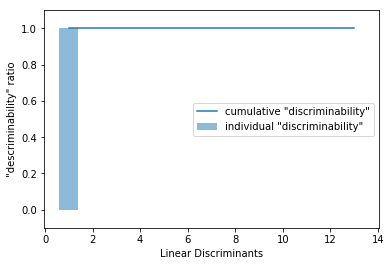

In [22]:
tot = sum(eigen_vals.real)
discr = [(i/tot) for i in sorted(eigen_vals.real, reverse=True)]
cum_discr = np.cumsum(discr)
plt.bar(range(1,14), discr, alpha=0.5, align='center', 
       label='individual "discriminability"')
plt.step(range(1,14), cum_discr, where='mid', 
         label='cumulative "discriminability"')
plt.ylabel('"descriminability" ratio')
plt.xlabel('Linear Discriminants')
plt.ylim([-0.1, 1.1])
plt.legend(loc='best')
plt.show()


In [23]:
## stacking the two (I have 1) most discriminative eigenvector cols
## to create the transformation matrix W
# w = np.hstack((eigen_pairs[0][1][:,np.newaxis].real,
#               eigen_pairs[1][1][:,np.newaxis].real))
 # *different from book numbers*
w = np.matrix([
        [-0.0707, -0.3778],
        [ 0.0359, -0.2223],
        [-0.0263, -0.3813],
        [ 0.1875,  0.2955],
        [-0.0033,  0.0143],
        [ 0.2328,  0.0151],
        [-0.7719,  0.2149],
        [-0.0803,  0.0726],
        [ 0.0896,  0.1767],
        [ 0.1815, -0.2909],
        [-0.0631,  0.2376],
        [-0.3794,  0.0867],
        [-0.3355, -0.586 ]])
print('Matrix W:\n', w)

Matrix W:
 [[-0.0707 -0.3778]
 [ 0.0359 -0.2223]
 [-0.0263 -0.3813]
 [ 0.1875  0.2955]
 [-0.0033  0.0143]
 [ 0.2328  0.0151]
 [-0.7719  0.2149]
 [-0.0803  0.0726]
 [ 0.0896  0.1767]
 [ 0.1815 -0.2909]
 [-0.0631  0.2376]
 [-0.3794  0.0867]
 [-0.3355 -0.586 ]]


#### Projecting samples onto the new feature space

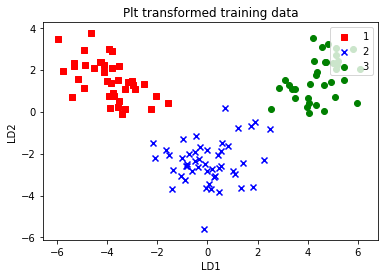

In [24]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train_std, y_train)

# plot X_train_lda to verify that its now linearly separable
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

for l,c,m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_lda[y_train==l, 0], X_train_lda[y_train==l, 1], c=c, label=l, marker=m)

plt.xlabel("LD1")
plt.ylabel("LD2")
plt.legend(loc="upper right")
plt.title("Plt transformed training data")
plt.show()

In [0]:
## LDA in scikit-learn
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components = 2)
X_train_lda = lda.fit_transform(X_train_std, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all poi

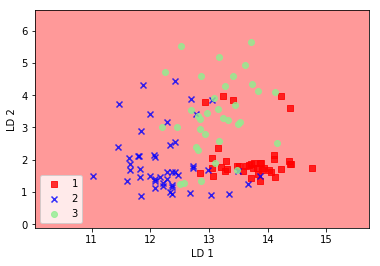

In [26]:
## how logistic regression classifier handles lower-dimensional
## training dataset after LDA transformation
lr = LogisticRegression()
lr = lr.fit(X_train_lda, y_train)
plot_decision_regions(X_train, y_train,
                     classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.show()
## BAD DATA** bad plot code is correct though :)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


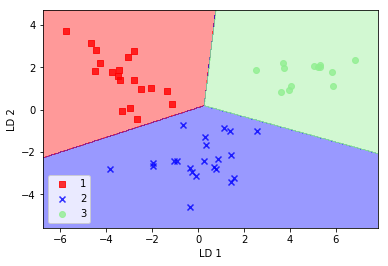

In [27]:
### hmm test data is classified correctly - this one is good!
X_test_lda = lda.transform(X_test_std)
plot_decision_regions(X_test_lda, y_test,
                     classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.show()

## Using Kernel principal component analysis for nonlinear mappings
New Data (moons) should be aite

### implementing kernel pca

In [0]:
from scipy.spatial.distance import pdist, squareform
from scipy import exp
from scipy.linalg import eigh
import numpy as np

def rbf_kernel_pca(X, gamma, n_components):
    """
    RBF kernel PCA implementation.

    Parameters
    ------------
    X: {NumPy ndarray}, shape = [n_samples, n_features]

    gamma: float
      Tuning parameter of the RBF kernel

    n_components: int
      Number of principal components to return

    Returns
    ------------
     X_pc: {NumPy ndarray}, shape = [n_samples, k_features]
       Projected dataset   

    """
    # Calculate pairwise squared Euclidean distances
    # in the MxN dimensional dataset.
    sq_dists = pdist(X, 'sqeuclidean')

    # Convert pairwise distances into a square matrix.
    mat_sq_dists = squareform(sq_dists)

    # Compute the symmetric kernel matrix.
    K = exp(-gamma * mat_sq_dists)

    # Center the kernel matrix.
    N = K.shape[0]
    one_n = np.ones((N,N)) / N
    K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)

    # Obtaining eigenpairs from the centered kernel matrix
    # numpy.eigh returns them in sorted order
    eigvals, eigvecs = eigh(K)

    # Collect the top k eigenvectors (projected samples)
    X_pc = np.column_stack((eigvecs[:, -i] 
                            for i in range(1, n_components + 1)))

    return X_pc

## Example 1: Separating half-moon shapes

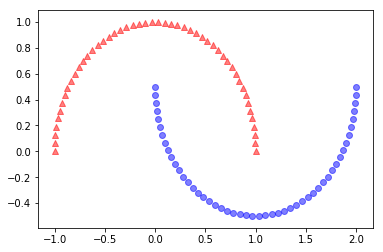

In [29]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, random_state=123)
plt.scatter(X[y==0, 0], X[y==0, 1], color='red', marker='^',
           alpha=0.5)
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue', marker='o',
           alpha=0.5)
plt.show()

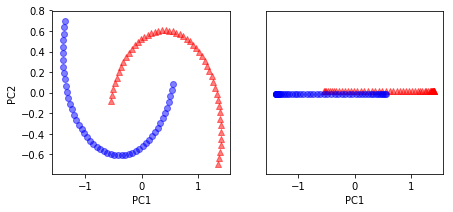

In [30]:
## clearly plot above not linearly separable
from sklearn.decomposition import PCA
scikit_pca = PCA(n_components=2)
X_spca = scikit_pca.fit_transform(X)
fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(7,3))
ax[0].scatter(X_spca[y==0, 0], X_spca[y==0, 1], 
              color='red', marker='^', alpha=0.5)
ax[0].scatter(X_spca[y==1, 0], X_spca[y==1, 1],
              color='blue', marker='o', alpha=0.5)
ax[1].scatter(X_spca[y==0, 0], np.zeros((50,1))+0.02, 
              color='red', marker='^', alpha=0.5)
ax[1].scatter(X_spca[y==1, 0], np.zeros((50,1))-0.02,
              color='blue', marker='o', alpha=0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


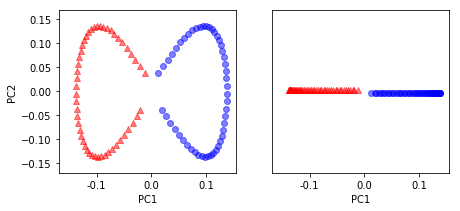

In [31]:
from matplotlib.ticker import FormatStrFormatter
X_kpca = rbf_kernel_pca(X, gamma=15, n_components=2)
fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(7,3))
ax[0].scatter(X_kpca[y==0, 0], X_kpca[y==0, 1], 
              color='red', marker='^', alpha=0.5)
ax[0].scatter(X_kpca[y==1, 0], X_kpca[y==1, 1],
              color='blue', marker='o', alpha=0.5)
ax[1].scatter(X_kpca[y==0, 0], np.zeros((50,1))+0.02, 
              color='red', marker='^', alpha=0.5)
ax[1].scatter(X_kpca[y==1, 0], np.zeros((50,1))-0.02,
              color='blue', marker='o', alpha=0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
ax[0].xaxis.set_major_formatter(FormatStrFormatter('%0.1f'))
ax[1].xaxis.set_major_formatter(FormatStrFormatter('%0.1f'))
plt.show()

notice now we are linearly separable!!

## Example 2: Separating concentric circles

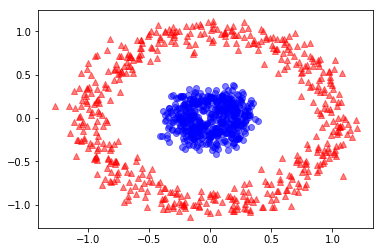

In [32]:
from sklearn.datasets import make_circles
X, y = make_circles(n_samples=1000,
                   random_state=123, noise=0.1, factor=0.2)
plt.scatter(X[y==0, 0], X[y==0, 1],
           color='red', marker='^', alpha=0.5)
plt.scatter(X[y==1, 0], X[y==1, 1],
           color='blue', marker='o', alpha=0.5)
plt.show()
## 2 class problem
## triangle, circle represent each class
## but PCA unsupervised, so this is just for illustration,
## classes would be unknown

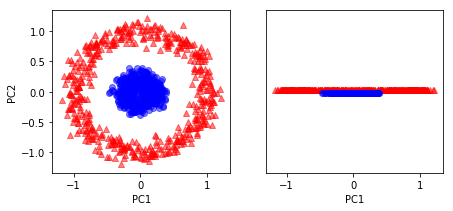

In [33]:
## starting with standard PCA and will compare with RBF kernel PCA
scikit_pca = PCA(n_components=2)
X_spca = scikit_pca.fit_transform(X)
fix, ax = plt.subplots(nrows=1, ncols=2, figsize=(7,3))
ax[0].scatter(X_spca[y==0, 0], X_spca[y==0, 1], 
              color='red', marker='^', alpha=0.5)
ax[0].scatter(X_spca[y==1, 0], X_spca[y==1, 1],
              color='blue', marker='o', alpha=0.5)
ax[1].scatter(X_spca[y==0, 0], np.zeros((500,1))+0.02, 
             color='red', marker='^', alpha=0.5)
ax[1].scatter(X_spca[y==1, 0], np.zeros((500,1))-0.02,
              color='blue', marker='o', alpha=0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
plt.show()
## we again see standard PCA produces results suitable for linear
## classifier

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


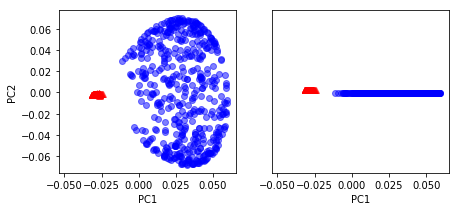

In [34]:
X_kpca = rbf_kernel_pca(X, gamma=15, n_components=2)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7,3))
ax[0].scatter(X_kpca[y==0, 0], X_kpca[y==0, 1], 
              color='red', marker='^', alpha=0.5)
ax[0].scatter(X_kpca[y==1, 0], X_kpca[y==1, 1],
              color='blue', marker='o', alpha=0.5)
ax[1].scatter(X_kpca[y==0, 0], np.zeros((500,1))+0.02, 
              color='red', marker='^', alpha=0.5)
ax[1].scatter(X_kpca[y==1, 0], np.zeros((500,1))-0.02,
              color='blue', marker='o', alpha=0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
plt.show()
## projection made classes linearly separable

#### Projecting New Data

Since kernel based PCA is memory based meaning need to reuse original training set each time project new sample. SO have to calculate RBF(similarity) between each <b>i</b>th sample in training set and new sample <b>x'</b>

In [0]:
## after calculating the similarity between samples, 
## we have to normalize the eigenvector a by its eigenvalue
from scipy.spatial.distance import pdist, squareform
from scipy import exp
from scipy.linalg import eigh
import numpy as np

def rbf_kernel_pca(X, gamma, n_components):
    """
    RBF kernel PCA implementation.

    Parameters
    ------------
    X: {NumPy ndarray}, shape = [n_samples, n_features]

    gamma: float
      Tuning parameter of the RBF kernel

    n_components: int
      Number of principal components to return

    Returns
    ------------
     X_pc: {NumPy ndarray}, shape = [n_samples, k_features]
       Projected dataset   

     lambdas: list
       Eigenvalues

    """
    # Calculate pairwise squared Euclidean distances
    # in the MxN dimensional dataset.
    sq_dists = pdist(X, 'sqeuclidean')

    # Convert pairwise distances into a square matrix.
    mat_sq_dists = squareform(sq_dists)

    # Compute the symmetric kernel matrix.
    K = exp(-gamma * mat_sq_dists)

    # Center the kernel matrix.
    N = K.shape[0]
    one_n = np.ones((N,N)) / N
    K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)

    # Obtaining eigenpairs from the centered kernel matrix
    # numpy.eigh returns them in sorted order
    eigvals, eigvecs = eigh(K)

    # Collect the top k eigenvectors (projected samples)
    alphas = np.column_stack((eigvecs[:,-i] 
                    for i in range(1,n_components+1)))

    # Collect the corresponding eigenvalues
    lambdas = [eigvals[-i] for i in range(1,n_components+1)]

    return alphas, lambdas

In [36]:
X, y = make_moons(n_samples=100, random_state=123)
alphas, lambdas = rbf_kernel_pca(X, gamma=15, n_components=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:50: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


In [37]:
## to mke sure implemented code for projecting new samples
## lets treat 26th point from half-moon set as now data point x'
## objective is to project it onto this new subspace
x_new = X[25]
x_new

array([1.8713, 0.0093])

In [38]:
x_proj = alphas[25] # original projection
x_proj

array([0.0788])

In [0]:
def project_x(n_new, X, gamma, alphas, lambdas):
    pair_dist = np.array([np.sum(
            (x_new-row)**2) for row in X])
    k=np.exp(-gamma * pair_dist)
    return k.dot(alphas / lambdas)

In [40]:
## reproduce original projection, Using project_x() will
## be able to proejct any new samples as well
x_reproj = project_x(x_new, X, gamma=15, alphas=alphas,
                    lambdas=lambdas)
x_reproj

array([0.0788])

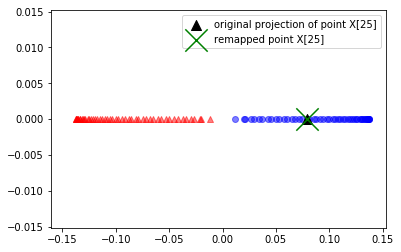

In [41]:
plt.scatter(alphas[y==0, 0], np.zeros((50)), 
            color='red', marker='^',alpha=0.5)
plt.scatter(alphas[y==1, 0], np.zeros((50)), 
            color='blue', marker='o', alpha=0.5)
plt.scatter(x_proj, 0, color='black', 
            label='original projection of point X[25]',
            marker='^', s=100)
plt.scatter(x_reproj, 0, color='green', 
            label='remapped point X[25]',
            marker='x', s=500)
plt.legend(scatterpoints=1)
plt.show()

## Kernal PCA in scikit-learn

In [0]:
from sklearn.decomposition import KernelPCA
X, y = make_moons(n_samples=100, random_state=123)
scikit_kpca = KernelPCA(n_components=2,
                       kernel='rbf', gamma=15)
X_skernpca = scikit_kpca.fit_transform(X)

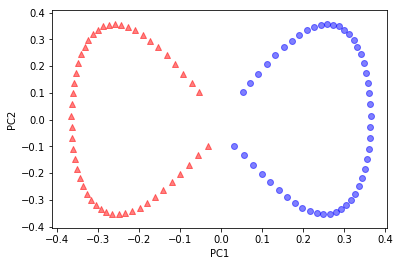

In [43]:
plt.scatter(X_skernpca[y==0, 0], X_skernpca[y==0, 1],
           color='red', marker='^', alpha=0.5)
plt.scatter(X_skernpca[y==1, 0], X_skernpca[y==1, 1],
           color='blue', marker='o', alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# Summary
In this chapter, you learned about three different, fundamental dimensionality reduction techniques for feature extraction: standard PCA, LDA, and kernel PCA. Using PCA, we projected data onto a lower-dimensional subspace to maximize the variance along the orthogonal feature axes while ignoring the class labels. LDA, in contrast to PCA, is a technique for supervised dimensionality reduction, which means that it considers class information in the training dataset to attempt to maximize the class-separability in a linear feature space. Lastly, you learned about a kernelized version of PCA, which allows you to map nonlinear datasets onto a lower-dimensional feature space where the classes become linearly separable.